In [2]:
import pandas as pd
import numpy as np
import glob
from svv_read import Sub_SVV
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sebastienvillard/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib auto
sns.set_style("whitegrid")
sns.set(font="monospace", font_scale=1.5)
# pd.options.display.max_rows = 10

Using matplotlib backend: MacOSX


In [4]:
# create data frame for results3
df = pd.DataFrame()

readfolder = '../DATA/EXP2/'
list_subject = glob.glob(readfolder+'/S*')
# list_subject

## check following outliers

 - check S50: -20º values (bucket moved during test)
 - check S45: very high angle and very short RT
 - check S46: similar S45
 - check S47: low angles

In [ ]:
for sub in list_subject:
    SUB = Sub_SVV(sub)
    df = df.append(SUB.create_table(), ignore_index=True)


In [6]:
# snb.stripplot(x='freq', y='SVV', data = df)
# snb.stripplot(x='freq', y='SVV', data = df[(df['stim']=='SH') & (df['SVV']>2.5)])

## check for Subjective Visual Vesrtical over 2.5º in control condition


In [7]:
outliers = [(np.abs(df.loc[i,'SVV'])>2.5) and (df.loc[i,'stim']=='CTRL') for i in df.index]
bad_id = df[outliers].id.unique()
df.insert(len(df.columns), 'Outliers', df['id'].isin(bad_id))

## graphical representation of SVV data with outliers in red

In [8]:
df.query('stim != "MX"').head()

,id,trial,stim,freq,rep,Angle_init,SVV,Reaction_time,Outliers
0,S67,T01,MF,120,T1,-21.060645,-0.527312,5030.0,False
1,S67,T18,AC,60,T0,-20.586103,-0.519436,3316.0,False
2,S67,T12,DC,0,T1,-24.734157,-2.567490,4143.0,False
3,S67,T09,AC,160,T1,-21.389072,-0.389072,4357.0,False
4,S67,T20,MF,20,T1,-22.588575,-1.121908,6114.0,False


In [10]:
df.stim.unique()

array(['MF', 'AC', 'DC', 'MX', 'CTRL'], dtype=object)

In [12]:
bool_good_id = ~df['id'].isin(bad_id)
bool_SHDC = df['freq'] == 0  # select CTRL and DC stimulation


if True:
    gdata = df.query('stim != "MX"')
    order = ['CTRL', 'DC', 'AC', 'MF']
    
    colorblind = sns.palettes.color_palette(palette='colorblind', n_colors=4)
    pal = dict(
        CTRL=colorblind[0], 
        DC=colorblind[1], 
        AC=colorblind[2],
        MF=colorblind[3]
    )
    
    g = sns.FacetGrid(gdata, 
                      col='freq', 
                      hue='Outliers',
                      hue_kws=dict(alpha=[0.4,1]),
                      sharex=False,
#                       aspect=0.8,
                      height=5
                     )  # check sns.catplot
                      
#     g.map(sns.swarmplot, 'stim', 'SVV', palette=pal, order=order, size=5, linewidth=1)
    
    for (i,j,k), data in g.facet_data():
        sorted_data = data.sort_values(by='stim')
        ax = g.facet_axis(i,j)
        s_pal = dict((k, v) for k, v in pal.items() if k in sorted_data.stim.unique())
        
        sns.swarmplot(data=sorted_data,
                     x='stim',
                     y='SVV',
                     hue='stim',
                     palette=s_pal,
                     alpha=g.hue_kws['alpha'][k]
                     )
        
        if j!=0:
            ax.set_ylabel('')
        
        ax.legend_.remove()
    
    g.set_titles("{col_name} Hz")
    g.set_xlabels('')
    

# Analysis over "good participants"

In [10]:
ndf = df[bool_good_id]  # remove subject with outliers SHAM data
ndf.insert(len(ndf.columns),'RT_deg',ndf['Reaction_time']/ndf['Angle_init'])  # create Time/deg column
ndf = ndf.drop(columns=['Angle_init','Reaction_time','Outliers'])
ndf = ndf.groupby(['id','stim','freq']).mean()

ref_svv = ndf.query('stim == "CTRL"')
ref_svv

,,,SVV,RT_deg
id,stim,freq,,
S40,CTRL,0,-0.133333,-208.146214
S41,CTRL,0,0.154135,-234.387189
S42,CTRL,0,-0.352208,-342.433534
S43,CTRL,0,-0.125796,-246.017915
S44,CTRL,0,-0.527896,-207.852142
S48,CTRL,0,-0.022167,-181.923408
S49,CTRL,0,-1.798269,-247.766362
S50,CTRL,0,0.253642,-350.256220
S51,CTRL,0,-0.555378,-363.153273


## create new table with delta-SVV as difference SVVcond - SVVctrl

In [11]:
to_subtract = ref_svv.reset_index(level=[1,2], drop=True)
to_subtract

,SVV,RT_deg
id,,
S40,-0.133333,-208.146214
S41,0.154135,-234.387189
S42,-0.352208,-342.433534
S43,-0.125796,-246.017915
S44,-0.527896,-207.852142
S48,-0.022167,-181.923408
S49,-1.798269,-247.766362
S50,0.253642,-350.256220
S51,-0.555378,-363.153273


In [12]:
delta_svv = ndf.sub(to_subtract,axis=0, level=0)
delta_svv.head()

SVV     RT_deg
id  stim freq                     
S40 AC   20   -0.675000 -14.781405
         60   -0.033333  26.559257
         120  -0.050000   1.334726
         160  -0.108333  -6.586047
    CTRL 0     0.000000   0.000000

In [13]:
delta_svv.reset_index(level=['stim', 'freq'], inplace=True)
delta_svv.head()

,stim,freq,SVV,RT_deg
id,,,,
S40,AC,20,-0.675000,-14.781405
S40,AC,60,-0.033333,26.559257
S40,AC,120,-0.050000,1.334726
S40,AC,160,-0.108333,-6.586047
S40,CTRL,0,0.000000,0.000000


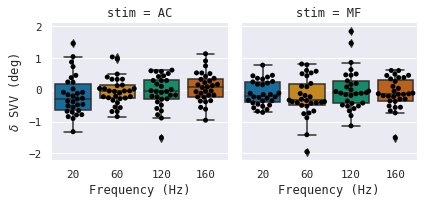

In [14]:
data = delta_svv.query('freq != 0 & stim != "MX"')
data.freq.astype(int)


g = sns.FacetGrid(data, col='stim')  # check sns.catplot
g.map(sns.boxplot, 'freq', 'SVV', palette='colorblind', order=[20, 60, 120, 160])
g.map(sns.swarmplot, 'freq', 'SVV', color='black', order=[20, 60, 120, 160])
g.set_xlabels('Frequency (Hz)')
g.set_ylabels(r'$\delta$ SVV (deg)')

# sns.despine(offset=10, trim=True);

if False:
    h = sns.FacetGrid(data, col='stim')
    h.map(sns.boxplot, 'freq', 'RT_deg', palette='colorblind')
    h.map(sns.swarmplot, 'freq', 'RT_deg', color='black')

# sns.boxplot(x='freq', y='SVV', data=data, hue='stim', palette='colorblind')
# sns.swarmplot(x='freq', y='SVV', data=data, hue='stim')


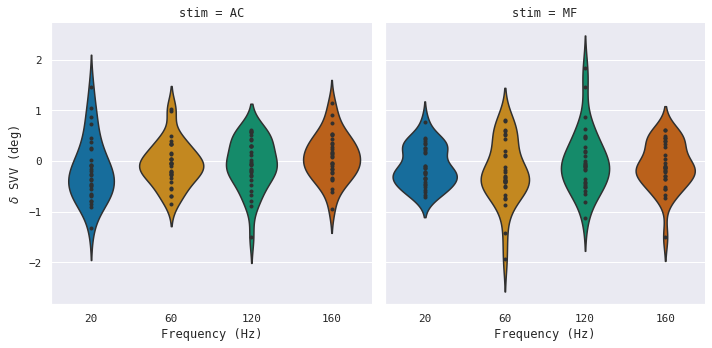

In [20]:
k = sns.catplot(data=data,
           kind='violin',
           x='freq',
           y='SVV',
           col='stim',
           palette='colorblind',
           inner='points')

k.set_xlabels('Frequency (Hz)')
k.set_ylabels(r'$\delta$ SVV (deg)')

## Export data for Analysis

In [17]:
# data.to_csv('TableRes_delta.csv')

In [18]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [19]:
fig.savefig('deltaSVV.png', dpi=300)